In [ ]:
#importlibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
#checking available files 
!ls

In [ ]:
#opening the king county housing data 
data = pd.read_csv('data/kc_house_data.csv')
data.head()

In [4]:
#getting data info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#checking null values
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#dropping 'yr_renovated' and 'waterfront' because they are missing
#more than 10% of their entries 
#dropping 'id' because its a unique identifier
#dropping 'date' because its not needed for this analysis
#dropping null values remaining 

data.drop('yr_renovated', axis=1, inplace=True)
data.drop('waterfront', axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data = data.dropna()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


King County Hardiness Zones 

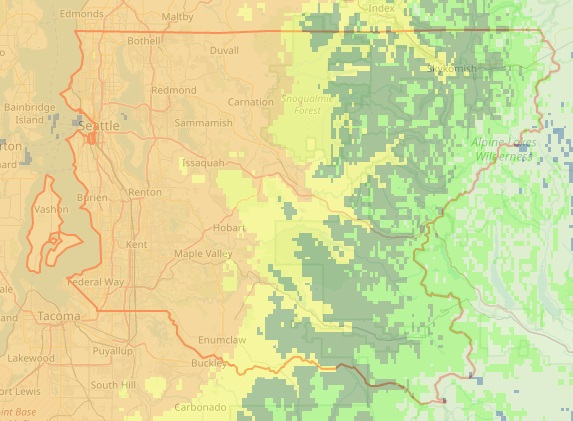

In [8]:
#takng the absolute value of the longitude 
data['long'] = data['long'].abs()
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,122.045,1800,7503


In [9]:
#creating zones based on hardiness 
# 8b = 4, 8a = 3, 7b = 2, 7a = 1
x = data['long'].tolist()
res = ["4" if i > 122.2 
       else "3" if i > 122.0 
       else "2" if i > 121.6
       else "1"for i in x]
data['zone'] = res
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,zone
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,122.257,1340,5650,4
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,122.319,1690,7639,4
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,122.233,2720,8062,4
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,122.393,1360,5000,4
4,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,122.045,1800,7503,3


def group_zone(long_list):
    if long_list[0] < -122.2:
        return '8b'
    elif long_list[0] < -122.0 and long_list[0] > -121.6:
        return '8a'
    elif long_list[0] < -121.6 and long_list[0] > -121.4:
        return '7b'
    else: 
        return '7a'
    
data.apply(lambda row: group_zone(row), axis=1)
data['zone'] = data.apply(lambda row: group_zone(row), axis=1)
data.head()

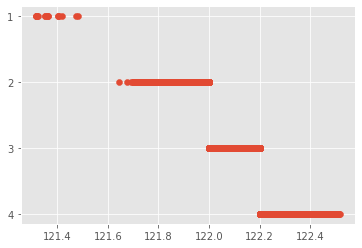

In [10]:
#using a scatter plot to visually assure the zones are correct
X = data['long']
Y = data['zone']
plt.scatter(X,Y)

In [11]:
#converting data type to integer
data['zone'] = data['zone'].astype(str).astype(int)

In [12]:
#limiting the dataset to show homes only in zone 4
data = data[data['zone'] > 3]
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,zone
count,1.221900e+04,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.0
mean,5.400324e+05,3.257550,1.969351,1899.905311,8692.686063,1.445249,1556.620509,1960.372944,98104.533841,47.577112,122.314984,1791.730993,7942.623455,4.0
std,4.118560e+05,0.999856,0.796732,870.018663,17971.342268,0.563265,706.292556,31.140452,54.793028,0.137439,0.057081,586.524152,11978.930863,0.0
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,1900.000000,98001.000000,47.257400,122.201000,460.000000,651.000000,4.0
25%,3.099500e+05,3.000000,1.000000,1290.000000,4400.000000,1.000000,1080.000000,1940.000000,98055.000000,47.499200,122.279000,1385.500000,4560.000000,4.0
50%,4.350000e+05,3.000000,2.000000,1730.000000,6604.000000,1.000000,1380.000000,1957.000000,98116.000000,47.602800,122.317000,1660.000000,6600.000000,4.0
75%,6.250000e+05,4.000000,2.500000,2310.000000,9085.000000,2.000000,1820.000000,1986.000000,98136.000000,47.687200,122.361000,2060.000000,8760.000000,4.0
max,7.700000e+06,33.000000,8.000000,12050.000000,843309.000000,3.500000,8860.000000,2015.000000,98199.000000,47.777600,122.519000,5500.000000,380279.000000,4.0


In [13]:
#dropping lat, long, and zipcode because they are similar to zone
data.drop('lat', axis=1, inplace=True)
data.drop('long', axis=1, inplace=True)
data.drop('zipcode', axis=1, inplace=True)

In [14]:
#engineering columns that contain size of lawn 
data['sqft_lawn'] = data['sqft_lot'].subtract(data['sqft_living'])
data['sqft_lawn15'] = data['sqft_lot15'].subtract(data['sqft_living15'])
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,zone,sqft_lawn,sqft_lawn15
count,1.221900e+04,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.000000,12219.0,12219.000000,12219.000000
mean,5.400324e+05,3.257550,1.969351,1899.905311,8692.686063,1.445249,1556.620509,1960.372944,1791.730993,7942.623455,4.0,6792.780751,6150.892463
std,4.118560e+05,0.999856,0.796732,870.018663,17971.342268,0.563265,706.292556,31.140452,586.524152,11978.930863,0.0,17866.404299,11897.923209
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,370.000000,1900.000000,460.000000,651.000000,4.0,-1900.000000,-1363.000000
25%,3.099500e+05,3.000000,1.000000,1290.000000,4400.000000,1.000000,1080.000000,1940.000000,1385.500000,4560.000000,4.0,2496.000000,2792.500000
50%,4.350000e+05,3.000000,2.000000,1730.000000,6604.000000,1.000000,1380.000000,1957.000000,1660.000000,6600.000000,4.0,4819.000000,4920.000000
75%,6.250000e+05,4.000000,2.500000,2310.000000,9085.000000,2.000000,1820.000000,1986.000000,2060.000000,8760.000000,4.0,7230.000000,7020.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,843309.000000,3.500000,8860.000000,2015.000000,5500.000000,380279.000000,4.0,839659.000000,378429.000000


In [15]:
#engineering columns that show lawn as percentage of the lot 
data['sqft_lawn_prct'] = data['sqft_lawn']/data['sqft_lot']
data['sqft_lawn_prct15'] = data['sqft_lawn15']/data['sqft_lot15']
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,zone,sqft_lawn,sqft_lawn15,sqft_lawn_prct,sqft_lawn_prct15
0,221900.0,3,1.00,1180,5650,1.0,NONE,Average,7 Average,1180,0.0,1955,1340,5650,4,4470,4310,0.791150,0.762832
1,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,1690,7639,4,4672,5949,0.645126,0.778767
2,180000.0,2,1.00,770,10000,1.0,NONE,Average,6 Low Average,770,0.0,1933,2720,8062,4,9230,5342,0.923000,0.662615
3,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,1360,5000,4,3040,3640,0.608000,0.728000
6,257500.0,3,2.25,1715,6819,2.0,NONE,Average,7 Average,1715,?,1995,2238,6819,4,5104,4581,0.748497,0.671799


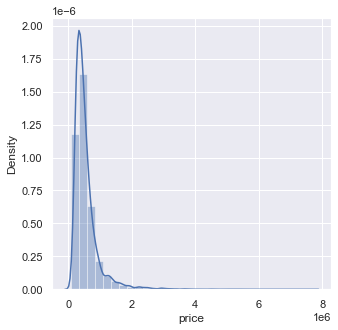

In [16]:
#checking for normal distribution on target variable 'price'
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(data['price'], bins=30)
plt.show()

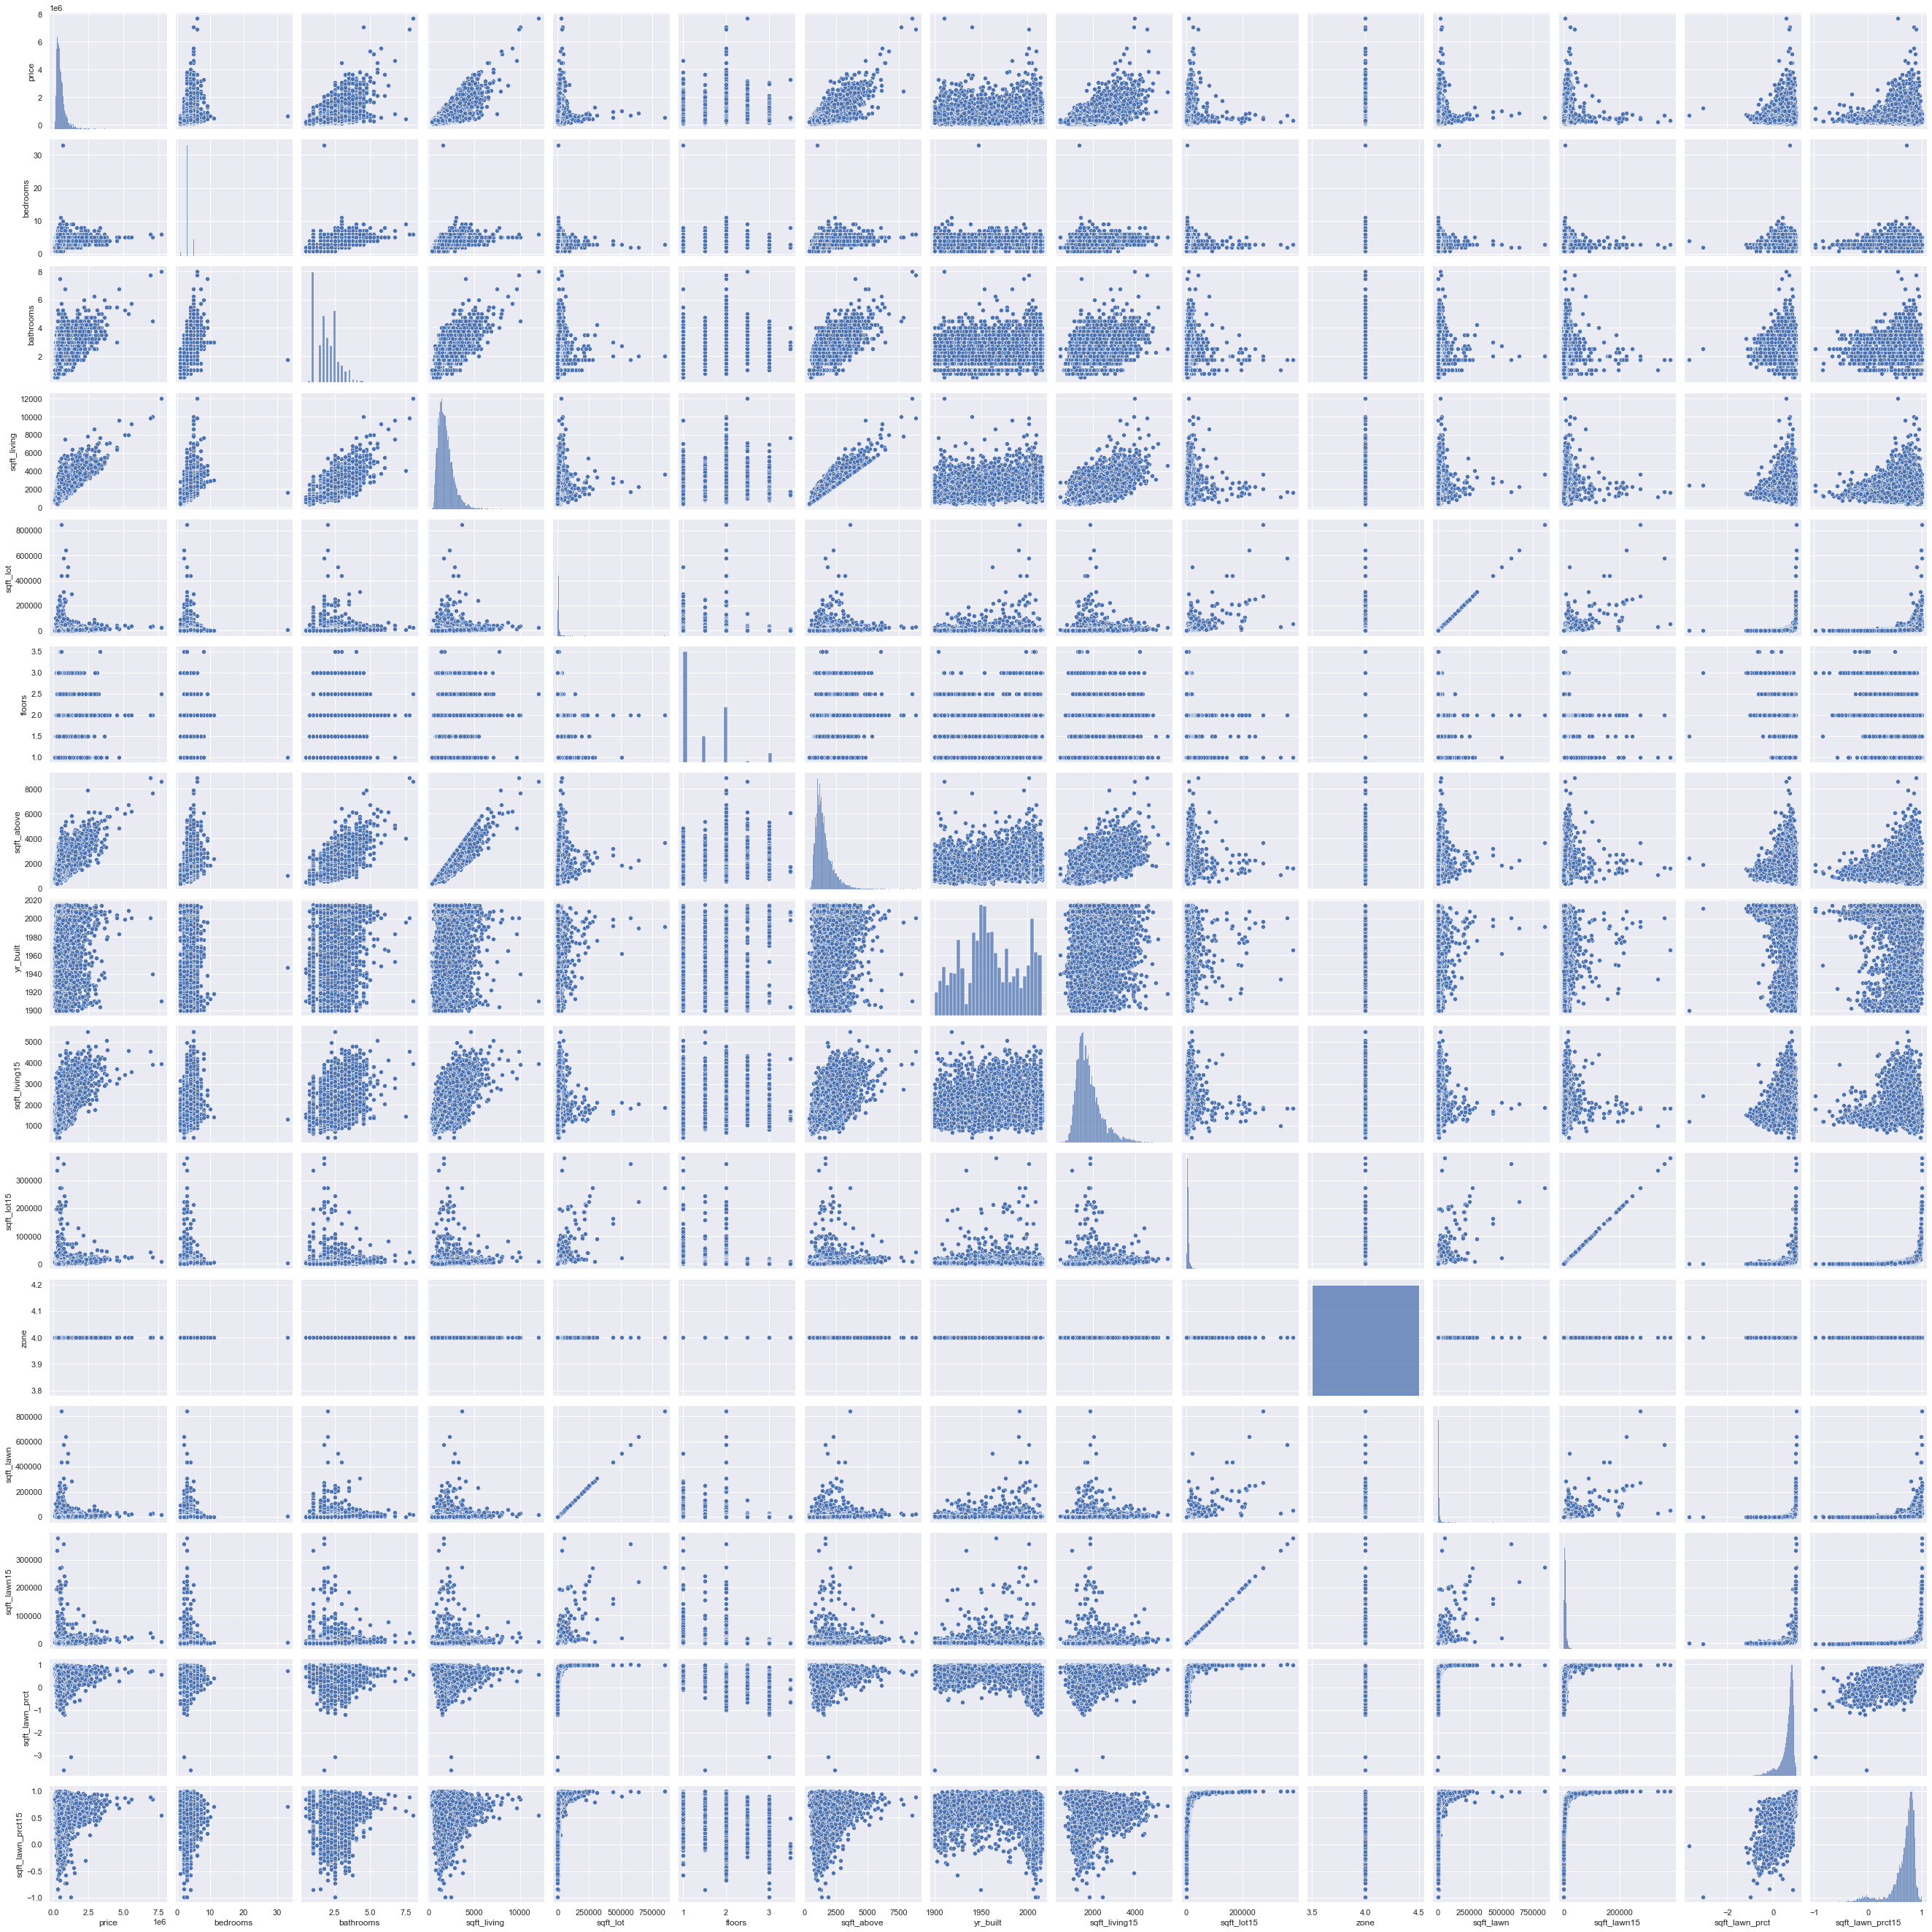

In [17]:
sns.pairplot(data)

KeyError: 'view'

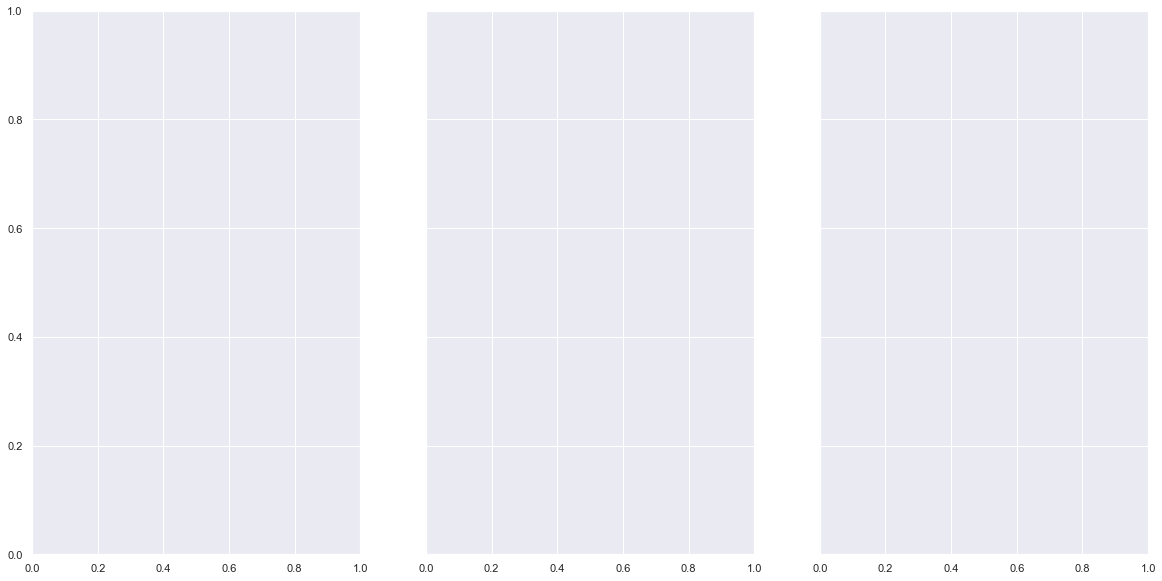

In [23]:
#plotting categorical variables 
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10), sharey=True)

categoricals = ['view', 'condition', 'grade']

for col, ax in zip(categoricals, axes.flatten()):
    (data.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [24]:
#dummy enconding categorical variables 

dummies = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)

data = data.drop(categoricals, axis=1)

data = pd.concat([data, dummies], axis=1)

data.head()

KeyError: "None of [Index(['view', 'condition', 'grade'], dtype='object')] are in the [columns]"

In [25]:
#renaming grade columns to contain no spaces 
data.rename(columns={'grade_11 Excellent': 'grade_Excellent', 'grade_12 Luxury': 'grade_Luxury', 'grade_13 Mansion': 'grade_Mansion', 'grade_4 Low': 'grade_Low', 'grade_5 Fair': 'grade_Fair','grade_6 Low Average': 'grade_Low_Average','grade_7 Average': 'grade_Average','grade_8 Good': 'grade_Good','grade_9 Better': 'grade_Better'}, inplace=True)

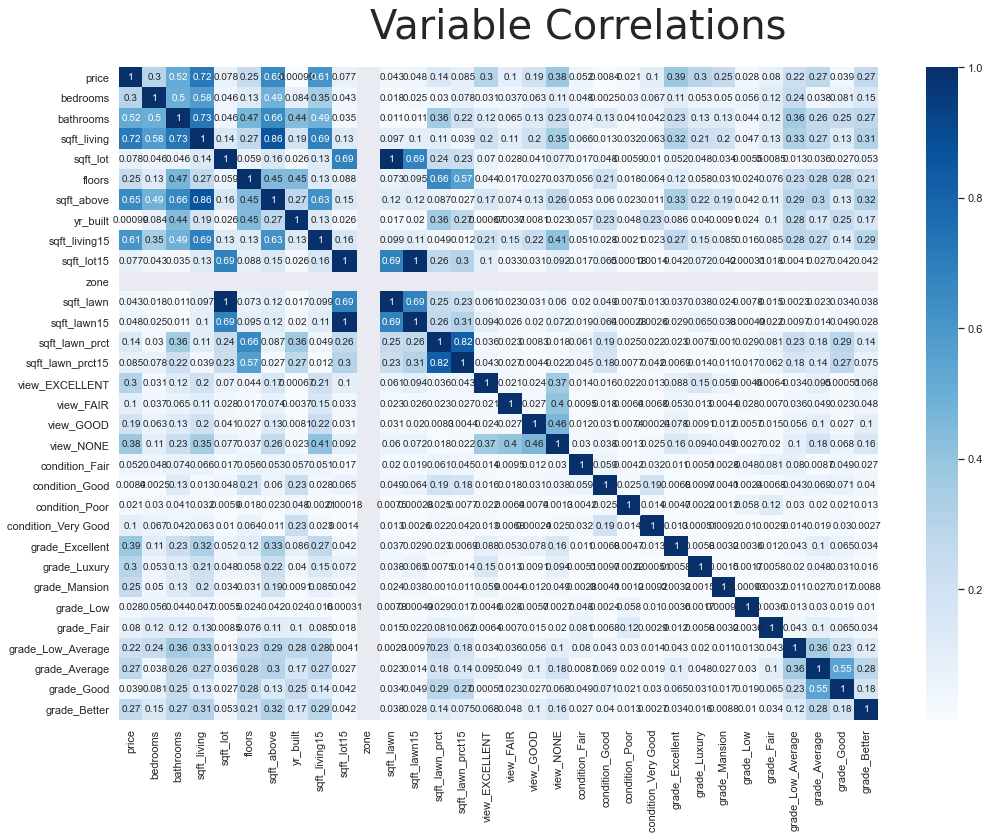

In [26]:
#checking variable correlations 
corr = data.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=40, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

In [27]:
#creating list of features and correlations 
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [28]:
#checking for multicollinearity
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

In [29]:
#printing variabl
print('Correlations with Price')
display(corr_price_df)
print('Multicollinear Features')
display(MC_df)

Correlations with Price


,Correlations,Features
1,0.720040,sqft_living
2,0.653637,sqft_above
3,0.612030,sqft_living15
0,0.517365,bathrooms
6,0.385658,grade_Excellent
5,0.381624,view_NONE
4,0.302921,view_EXCELLENT
7,0.300534,grade_Luxury


Multicollinear Features


,Correlations,Features
1,0.998838,"[sqft_lot, sqft_lawn]"
4,0.998838,"[sqft_lawn, sqft_lot]"
3,0.998816,"[sqft_lot15, sqft_lawn15]"
5,0.998816,"[sqft_lawn15, sqft_lot15]"
0,0.859438,"[sqft_living, sqft_above]"
2,0.859438,"[sqft_above, sqft_living]"
6,0.817622,"[sqft_lawn_prct, sqft_lawn_prct15]"
7,0.817622,"[sqft_lawn_prct15, sqft_lawn_prct]"


In [30]:
#creating model with variables most highly correlated with price 
#replacing bathroom with bedroom because better p-value
Model_1 = smf.ols(formula='price ~ sqft_living + sqft_above + sqft_living15 + bedrooms + grade_Excellent + view_EXCELLENT + grade_Luxury', data=data).fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     2819.
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:34:04   Log-Likelihood:            -1.6943e+05
No. Observations:               12219   AIC:                         3.389e+05
Df Residuals:                   12211   BIC:                         3.389e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -5.03e+04   9781.967     -5.143      0.000   -6.95e+04   -3.11e+04
sqft_living       244.2391      6.114     39.946      0.000     232.254     256.224
sqft_above         33.2022      6.463      5.137      0.000      20.533      45.871
sqft_living15     119.5460      5.530     21.618      0.000     108.706     130.386
bedrooms        -4.814e+04   2883.154    -16.698      0.000   -5.38e+04   -4.25e+04
grade_Excellent  5.889e+05   2.27e+04     25.984      0.000    5.45e+05    6.33e+05
view_EXCELLENT   3.739e+05   1.75e+04     21.390      0.000     3.4e+05    4.08e+05
grade_Luxury     1.107e+06   4.63e+04     23.930      0.000    1.02e+06     1.2e+06
==============================================================================
Omnibus:                     5722.006   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           185887.034
Skew:                           1.623   Prob(JB):                         0.00
Kurtosis:                      21.830   Cond. No.                     6.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#check for linearity 
#use seaborn pair plot (all variables)
#make scatterplot against price 
#two recommendations using coefficient 
#figure out what makes grade excellent and talk about it to the stakeholder 
#iterate more models 

In [32]:
train, test = train_test_split(data)

In [33]:
train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,condition_Very Good,grade_Excellent,grade_Luxury,grade_Mansion,grade_Low,grade_Fair,grade_Low_Average,grade_Average,grade_Good,grade_Better
8819,460000.0,3,1.75,1970,9135,1.0,1370,600.0,1961,1880,...,0,0,0,0,0,0,0,1,0,0
895,980000.0,5,2.50,3160,11470,1.0,1780,1380.0,1971,3260,...,0,0,0,0,0,0,0,0,0,1
3250,439000.0,1,1.00,790,2400,1.0,790,0.0,1918,1580,...,0,0,0,0,0,0,0,1,0,0
1925,316500.0,3,1.75,1460,6360,1.0,1010,450.0,1979,1400,...,0,0,0,0,0,0,0,1,0,0
3841,615000.0,4,2.75,2750,15450,1.0,1800,950.0,1978,2750,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,250000.0,2,1.00,1030,8786,1.0,1030,0.0,1956,1480,...,0,0,0,0,0,0,1,0,0,0
9900,400000.0,3,2.50,1460,1319,3.0,1460,0.0,2002,1430,...,0,0,0,0,0,0,0,0,1,0
16867,353500.0,2,1.00,800,8775,1.0,800,0.0,1942,1470,...,0,0,0,0,0,0,1,0,0,0
11373,420000.0,4,2.00,2280,10319,1.0,1270,1010.0,1989,2280,...,0,0,0,0,0,0,0,0,1,0


In [34]:
test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,sqft_living15,...,condition_Very Good,grade_Excellent,grade_Luxury,grade_Mansion,grade_Low,grade_Fair,grade_Low_Average,grade_Average,grade_Good,grade_Better
19469,299000.0,3,2.25,2540,9961,1.0,1320,1220.0,1969,1870,...,0,0,0,0,0,0,0,0,1,0
17947,239900.0,4,1.75,1570,18730,1.0,1200,370.0,1960,1920,...,0,0,0,0,0,0,0,1,0,0
12655,227000.0,3,1.75,2380,12681,1.0,1380,1000.0,1918,1720,...,0,0,0,0,0,0,1,0,0,0
12409,263000.0,3,1.50,1300,7885,1.0,1300,0.0,1968,1840,...,0,0,0,0,0,0,0,1,0,0
8397,315000.0,3,2.25,1370,1533,3.0,1370,0.0,2009,1370,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,485000.0,3,1.00,1260,7250,1.0,960,300.0,1940,1540,...,0,0,0,0,0,0,0,1,0,0
17472,428000.0,3,2.00,1310,2550,1.0,780,530.0,1986,1460,...,0,0,0,0,0,0,0,1,0,0
20350,635000.0,4,2.50,2500,4000,2.0,2500,0.0,2014,1480,...,0,0,0,0,0,0,0,0,1,0
12191,335000.0,4,2.25,2100,7305,1.0,1050,1050.0,1963,1760,...,0,0,0,0,0,0,0,1,0,0


In [35]:
y = data[['price']]
X = data[['sqft_living', 'sqft_above', 'sqft_living15', 'bedrooms', 'grade_Excellent', 'view_EXCELLENT', 'grade_Luxury']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
X_train

,sqft_living,sqft_above,sqft_living15,bedrooms,grade_Excellent,view_EXCELLENT,grade_Luxury
7479,1640,1640,1540,3,0,0,0
13221,2650,2650,1200,4,0,0,0
3105,1470,1470,1790,3,0,0,0
1490,1730,1730,2180,3,0,0,0
4402,4280,2180,2490,4,1,1,0
...,...,...,...,...,...,...,...
17290,1270,1270,1580,2,0,0,0
3311,1890,980,1590,4,0,0,0
5347,2810,1710,1860,4,0,0,0
15533,2700,1350,1700,3,0,0,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Instantiate a custom transformer for log transformation 
log_transformer = FunctionTransformer(np.log, validate=True)

# Columns to be log transformed 
log_columns = ['sqft_above', 'sqft_living', 'sqft_living15']

# New names for columns after transformation
new_log_columns = ['log_sqft_above', 'log_sqft_living', 'sqft_living15']

# Log transform the training columns and convert them into a DataFrame 
X_train_log = pd.DataFrame(log_transformer.fit_transform(X_train[log_columns]), 
                           columns=new_log_columns, index=X_train.index)

# Replace training columns with transformed versions
X_train = pd.concat([X_train.drop(log_columns, axis=1), X_train_log], axis=1)
X_train

,bedrooms,grade_Excellent,view_EXCELLENT,grade_Luxury,log_sqft_above,log_sqft_living,sqft_living15
1502,5,0,0,0,8.266164,8.266164,8.058327
3770,3,0,0,0,7.272398,7.272398,7.056175
19908,3,0,0,0,7.229839,7.432484,7.432484
13513,3,0,0,0,7.200425,7.200425,7.396335
1391,2,0,0,0,6.779922,6.779922,7.200425
...,...,...,...,...,...,...,...
21079,4,0,0,0,7.543803,7.543803,7.595890
9167,4,0,0,0,7.580700,8.199739,7.570443
9517,2,0,0,0,6.721426,6.721426,7.200425
1615,3,0,0,0,6.721426,7.130899,7.326466


In [39]:
# Log transform the test columns and convert them into a DataFrame 
X_test_log = pd.DataFrame(log_transformer.transform(X_test[log_columns]), 
                          columns=new_log_columns, index=X_test.index)

# Replace testing columns with transformed versions
X_test = pd.concat([X_test.drop(log_columns, axis=1), X_test_log], axis=1)
X_test

,bedrooms,grade_Excellent,view_EXCELLENT,grade_Luxury,log_sqft_above,log_sqft_living,sqft_living15
17563,3,0,0,0,7.432484,7.495542,7.358831
20549,3,0,0,0,7.056175,7.229839,7.229839
2972,4,0,0,1,8.488794,8.488794,8.183118
17107,3,0,0,0,7.326466,7.326466,7.495542
20838,2,0,0,0,7.484369,7.595890,7.578145
...,...,...,...,...,...,...,...
18274,4,0,0,0,8.314587,8.314587,7.795647
14937,4,0,0,0,7.244228,7.517521,7.517521
18713,3,0,0,0,7.003065,7.003065,7.081709
5474,2,0,0,0,6.966024,6.966024,6.845880


In [40]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Categorical columns
cat_columns = ['bedrooms']

# Fit encoder on training set
ohe.fit(X_train[cat_columns])

# Get new column names
new_cat_columns = ohe.get_feature_names(input_features=cat_columns)

# Transform training set
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train[cat_columns]),
                           columns=new_cat_columns, index=X_train.index)

# Replace training columns with transformed versions
X_train = pd.concat([X_train.drop(cat_columns, axis=1), X_train_ohe], axis=1)
X_train

,grade_Excellent,view_EXCELLENT,grade_Luxury,log_sqft_above,log_sqft_living,sqft_living15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_11,bedrooms_33
1502,0,0,0,8.266164,8.266164,8.058327,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3770,0,0,0,7.272398,7.272398,7.056175,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19908,0,0,0,7.229839,7.432484,7.432484,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13513,0,0,0,7.200425,7.200425,7.396335,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1391,0,0,0,6.779922,6.779922,7.200425,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21079,0,0,0,7.543803,7.543803,7.595890,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9167,0,0,0,7.580700,8.199739,7.570443,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9517,0,0,0,6.721426,6.721426,7.200425,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1615,0,0,0,6.721426,7.130899,7.326466,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Transform testing set
X_test_ohe = pd.DataFrame(ohe.transform(X_test[cat_columns]),
                           columns=new_cat_columns, index=X_test.index)

# Replace testing columns with transformed versions
X_test = pd.concat([X_test.drop(cat_columns, axis=1), X_test_ohe], axis=1)
X_test

,grade_Excellent,view_EXCELLENT,grade_Luxury,log_sqft_above,log_sqft_living,sqft_living15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_11,bedrooms_33
17563,0,0,0,7.432484,7.495542,7.358831,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20549,0,0,0,7.056175,7.229839,7.229839,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2972,0,0,1,8.488794,8.488794,8.183118,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17107,0,0,0,7.326466,7.326466,7.495542,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20838,0,0,0,7.484369,7.595890,7.578145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18274,0,0,0,8.314587,8.314587,7.795647,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14937,0,0,0,7.244228,7.517521,7.517521,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18713,0,0,0,7.003065,7.003065,7.081709,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5474,0,0,0,6.966024,6.966024,6.845880,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [43]:
#change to RMSE or MAE (mean absolute error) so it's in the same scale 
#our model is $$$ difference on average 
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 74378710917.31361
Test Mean Squared Error: 83159504019.10567
